<a href="https://colab.research.google.com/github/jeanrobertt/ImersaoDados/blob/main/Aula02_desafios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aula 02

**Primeiros passos...**

Importação dos dados

Ajuste nas colunas onde existiam hífens

Alteração do nome da coluna `droga` para `composto`

In [92]:
import pandas as pd

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')

dados.columns = dados.columns.str.replace('-', '')    # Alteração nos nomes das colunas onde existiam hífens

mapa = {'droga': 'composto'}
dados.rename(columns=mapa, inplace=True)              #Alteração do nome da coluna
dados

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...

Para uma melhor visualização do gráfico dos compostos, será utilizado apenas os 5 compostos que mais aparecem.

Em seguida é mostrado o gráfico com esses 5 compostos

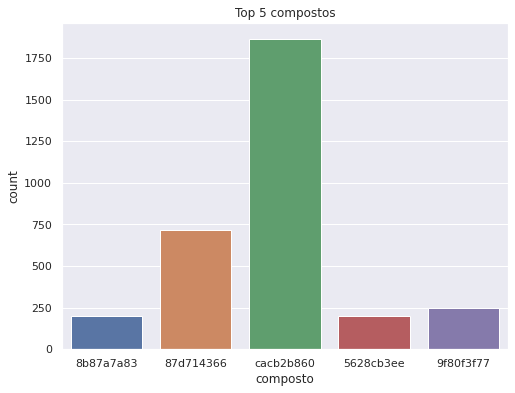

In [93]:
cod_compostos = dados['composto'].value_counts().index[0:5]

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(8, 6))
ax = sns.countplot(x = 'composto', data=dados.query('composto in @cod_compostos'))
ax.set_title('Top 5 compostos')
plt.show()

### Desafio 01: Ordenar o gráfico countplot



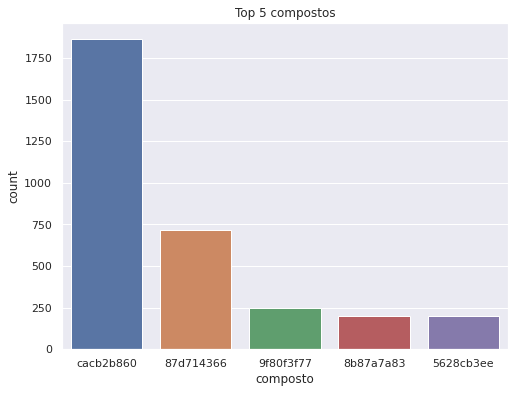

In [94]:
compostos_query = dados.query('composto in @cod_compostos')
sns.set()
plt.figure(figsize=(8, 6))
ax = sns.countplot(
    x = 'composto', 
    data=compostos_query, 
    order=compostos_query['composto'].value_counts().index)         # .value_counts(ascending=True) / Ordena do menor para o maior
ax.set_title('Top 5 compostos')
plt.show()

### Desafio 02: Melhorar a visualização do gráfico

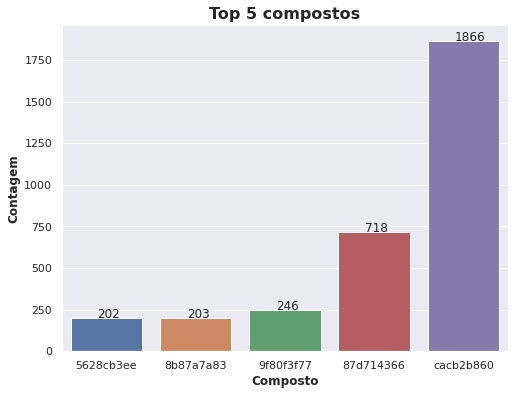

In [95]:
compostos_query = dados.query('composto in @cod_compostos')
sns.set()
plt.figure(figsize=(8, 6))
ax = sns.countplot(
    x = 'composto', 
    data=compostos_query, 
    order=compostos_query['composto'].value_counts(ascending=True).index)
ax.set_title('Top 5 compostos', fontweight='bold', fontsize=16)
ax.set_xlabel('Composto', fontweight='bold')
ax.set_ylabel('Contagem', fontweight='bold')
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()))            # O laço for com o annotate escreve o valor de cada barra acima dela
plt.show()

###Desafio 03: Plotar os histogramas com seaborn

Para fazer uma análise das expressões gênicas `g's` e da viabilidade celular `c's`, o melhor método é utilizar histogramas.

Primeiro a análise do `g0`

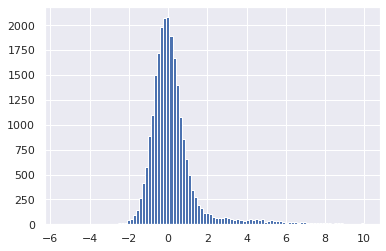

In [96]:
dados['g0'].hist(bins = 100)

Porém fazer uma ánalise de cada uma das expressões genicas é inviável.

Utilizando o método `describe()` é possível ter informações adicionais que podem ajudar.

In [97]:
dados.loc[:,'g0':'g771'].describe()

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,...,g732,g733,g734,g735,g736,g737,g738,g739,g740,g741,g742,g743,g744,g745,g746,g747,g748,g749,g750,g751,g752,g753,g754,g755,g756,g757,g758,g759,g760,g761,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,0.132026,...,0.263569,-0.242638,0.110180,-0.039868,-0.064056,0.193629,0.004470,-0.187085,0.067186,0.006159,-0.201189,-0.243317,0.548903,0.247065,0.085950,0.090544,0.215525,-0.007705,0.236954,0.022785,0.103224,0.048402,0.109367,-0.103262,0.004129,0.066211,0.072773,-0.033051,-0.400643,-0.338978,0.207299,0.009161,0.171027,0.002316,-0.209799,-0.076251,0.134162,-0.128018,-0.219210,0.101524
std,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,0.990477,...,1.075809,1.309482,0.881283,0.917119,1.186966,1.212621,1.175611,1.182180,1.057292,0.996940,1.029370,1.378815,2.023791,1.639307,1.238753,0.961212,1.293783,0.966213,1.284074,1.015557,1.035968,1.048645,0.856080,1.175372,0.701031,0.996914,1.077310,1.579948,1.913468,1.701554,1.096488,1.200395,1.357701,1.052771,1.201918,1.115477,0.951264,1.230636,1.326193,1.417674
min,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,-4.223000,...,-5.504000,-10.000000,-3.790000,-10.000000,-10.000000,-10.000000,-7.920000,-10.000000,-9.462000,-6.634000,-10.000000,-10.000000,-2.912000,-9.833000,-7.227000,-5.561000,-8.393000,-5.790000,-4.915000,-10.000000,-10.000000,-7.918000,-5.255000,-10.000000,-6.264000,-10.000000,-5.505000,-10.000000,-10.000000,-10.000000,-8.193000,-10.000000,-9.795000,-8.180000,-10.000000,-10.000000,-4.269000,-10.000000,-10.000000,-10.000000
25%,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.404150,-0.391950,-0.513775,-0.272200,-0.488675,-0.524600,-0.538900,-0.440375,-0.508900,-0.533900

Apesar de ter várias estátisticas úteis ainda seria necessário análisar cada um dos genes separadamente.

Pra resolver isso, é possível transpor as linhas e colunas (transformar as linhas em colunas e vice-versa).

In [98]:
dados.loc[:,'g0':'g771'].describe().T

,count,mean,std,min,25%,50%,75%,max
g0,23814.0,0.248366,1.393399,-5.513,-0.473075,-0.00885,0.525700,10.000
g1,23814.0,-0.095684,0.812363,-5.737,-0.562200,-0.04660,0.403075,5.039
g2,23814.0,0.152253,1.035731,-9.104,-0.437750,0.07520,0.663925,8.257
g3,23814.0,0.081971,0.950012,-5.998,-0.429575,0.00805,0.463400,10.000
g4,23814.0,0.057347,1.032091,-6.369,-0.470925,-0.02690,0.465375,10.000
...,...,...,...,...,...,...,...,...
g767,23814.0,-0.076251,1.115477,-10.000,-0.506200,0.00990,0.511175,6.317
g768,23814.0,0.134162,0.951264,-4.269,-0.353100,0.00540,0.409075,10.000
g769,23814.0,-0.128018,1.230636,-10.000,-0.544600,0.00060,0.498500,5.911
g770,23814.0,-0.219210,1.326193,-10.000,-0.554400,0.02870,0.496400,10.000


Agora é possível fazer os histogramas utilizando as estátiscas ao invés dos genes.

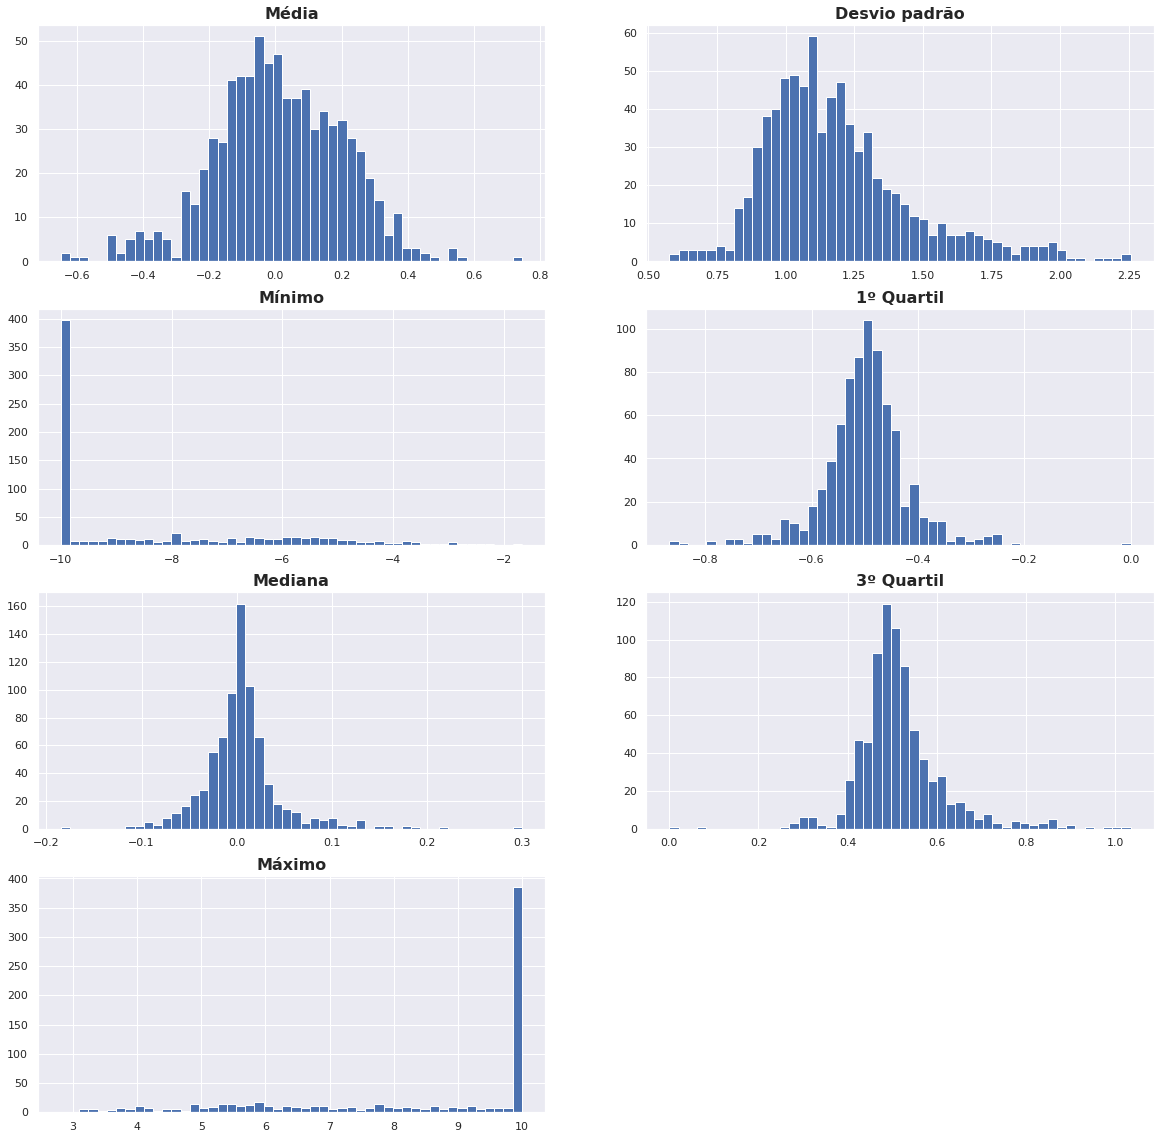

In [99]:
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
ax = dados.loc[:,'g0':'g771'].describe().T['mean'].hist(bins=50)
ax.set_title('Média', fontweight='bold', fontsize=16)

plt.subplot(4,2,2)
ax = dados.loc[:,'g0':'g771'].describe().T['std'].hist(bins=50)
ax.set_title('Desvio padrão', fontweight='bold', fontsize=16)

plt.subplot(4,2,3)
ax = dados.loc[:,'g0':'g771'].describe().T['min'].hist(bins=50)
ax.set_title('Mínimo', fontweight='bold', fontsize=16)

plt.subplot(4,2,4)
ax = dados.loc[:,'g0':'g771'].describe().T['25%'].hist(bins=50)
ax.set_title('1º Quartil', fontweight='bold', fontsize=16)

plt.subplot(4,2,5)
ax = dados.loc[:,'g0':'g771'].describe().T['50%'].hist(bins=50)
ax.set_title('Mediana', fontweight='bold', fontsize=16)

plt.subplot(4,2,6)
ax = dados.loc[:,'g0':'g771'].describe().T['75%'].hist(bins=50)
ax.set_title('3º Quartil', fontweight='bold', fontsize=16)

plt.subplot(4,2,7)
ax = dados.loc[:,'g0':'g771'].describe().T['max'].hist(bins=50)
ax.set_title('Máximo', fontweight='bold', fontsize=16)

plt.show()

###Desafio 04: Estudar sobre as estátisticas retornadas no `.describe()`
e
###Desafio 05: Refletir sobre a manipulação dos tamanhos da visualizações.


Nesse artigo do medium: [Visualização de dados com Seaborn](https://medium.com/@gisely.alves/visualiza%C3%A7%C3%A3o-de-dados-com-seaborn-2fd0defd9adb), há uma explicação bem completa do que são as estátisticas retornadas com o `describe()`, além de exemplos de várias visualizações usando seaborn, incluindo uma explicação muito boa do boxplot, explicando cada um dos elementos.

 Excelente artigo para consulta posterior 

###Desafio 06: Fazer outras análises com o boxplot e até com o histograma.

Boxplots são um tipo de gráfico com muita informação sobre os dados: Nele conseguimos ver o limite inferior e superior, os quartis, a mediana, como os dados estão distribuídos e os possíveis outliers.

No desafio 05, tem um link para mais informações sobre boxplot e outros.

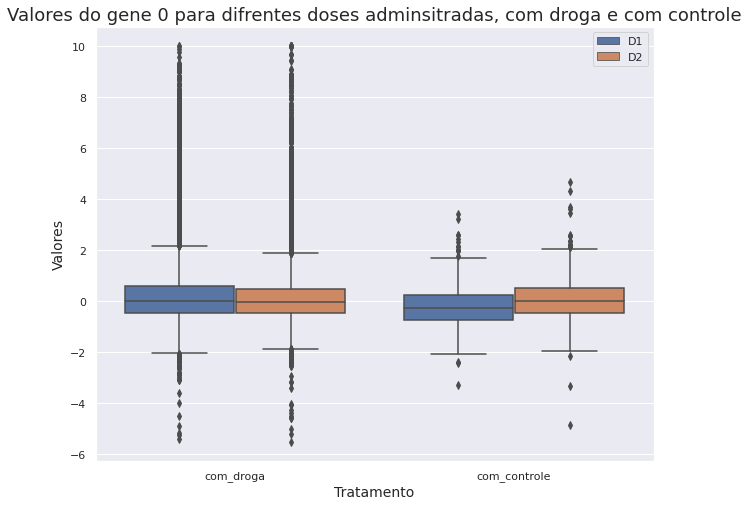

In [124]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(y='g0', x='tratamento', hue='dose', data=dados)
ax.set_title('Valores do gene 0 para difrentes doses adminsitradas, com droga e com controle', fontsize = 18)
ax.set_xlabel('Tratamento', fontsize = 14)
ax.set_ylabel('Valores', fontsize = 14)
ax.legend(loc = 'best')
plt.show()

Antes de analisar ese gráfico é importante saber sobre outliers.
Esses são:
>Dados que se diferenciam drasticamente de todos os outros, são pontos fora da curva normal.

Eles são os que estão abaixo do limite inferior e/ou do limite superior.
Entender os outliers é fundamental em uma análise de dados por pelo menos dois aspectos:

1.   Os outliers podem viesar negativamente todo o resultado de uma análise;
2.   O comportamento dos outliers pode ser justamente o que está sendo procurado.

No gráfico acima, é possível notar que os valores de g0 que estão dentro dos limites são muito semelhantes em ambos os tratamentos `com droga` e `com controle`, e com a dose 01 e dose 02.

Mas o diferencial está justamente nos outliers. Então, com as informações disponíveis até o momento, é possível que os dados que buscamos são justamente os outliers.

Agora, o teste será feito com outro gene.

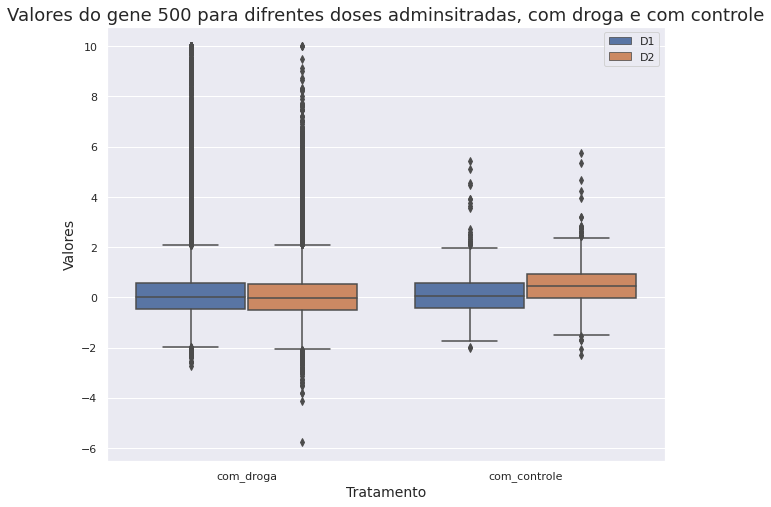

In [126]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(y='g500', x='tratamento', hue='dose', data=dados)
ax.set_title('Valores do gene 500 para difrentes doses adminsitradas, com droga e com controle', fontsize = 18)
ax.set_xlabel('Tratamento', fontsize = 14)
ax.set_ylabel('Valores', fontsize = 14)
ax.legend(loc = 'best')
plt.show()

Novamente, em ambos os casos com controle e com droga, com dose 1 e dose 2. Os valores são muito próximos, e o diferencial está nos outliers.

Desafio 07: Resumo do que aprendeu com os dados.

Com as informações adquiridas e as análises feitas por meio dos gráficos (principalmente o boxplot), pode-se concluir que alguns compostos estão gerando alguns valores fora do padrão.

Então, esses compostos devem ser analisados para chegar uma conclusão melhor do que significam essas anomalias nos valores. 